# LC Test Task

Hello LC,

Thank you for giving me a test task on audio classification. To be honest, it is my first time doing Audio Classification (as I said in our talk, I'm from text NLP background). Nevertheless, In this week, I study about it and I have fun on experimenting this task. I have soo much things to do in this experiment to satisfy my curiousity. But, in order not to make you wait no too long to assess me, I will limit myself to finish this task in a week.

In this work, I tried several models to be trained. Based on my experiment, I got 98.4% accuracy on the test set using wav2vec2 pre-trained model, outperforming other experiment scenario that I've tried.

---

There are several URLs that you can access contains information about my experiments.

Git (Data, Model, and Repo Versioning): https://gitlab.com/haryo97/lc-fun-technical  (I used DVC to version my data and model)  
Wandb (to track my experiment): https://wandb.ai/haryoaw/lcspeech 


## Table of contents

1. Plan
2. Technical Details
3. Results
4. Future Work
6. Demo
5. Conclusion


## Plan

In this task, I should create a audio classification by using [Speech Commands Dataset](https://www.tensorflow.org/datasets/catalog/speech_commands). The data contains 84843 training data, 9981 validation data, and 11005 test set. It contains 12 labels, which are `down`, `go`, `left`, `no`, `off`, `on`, `right`, `stop`, `up`, `yes`, `_silence_`, and `_unknown_`. The data itself contains more than 12 labels, all labels that are not in the label list will be considered as `_unknown_`. 

When I started this task, I gather information on how to do audio classification. I found out that the process is very similar to computer vision (CV) technique, where the model that is used is CV model, such as VGGNET, RESNET, and many CV models. There is a difference, which is the data input. In audio, you need to represent the audio to something that can act as the input of Deep Learning Model. There are several feature representation in audio such as waveform, spectogram, mel spectogram, and MFCC. After I explore about them, I decided to limit the scope of my experiment to use mel-spectogram, since they're popular to be used based on my exploration (except wav2vec2, where you need waveform input).

There are many struggles that I've found such as the difficulty on finding a right, proper technique to do audio classification on internet. The resources is not as abundant as Computer Vision or Text Natural Language Processing (NLP). I read several papers in INTERSPEECH 2020 (speech procedding conference) and haven't found any technique that do finetuning. There are many articles or videos that suggest finetuning using a CV pretrained model such as ImageNet. But, It's not reliable because they're not peer reviewed and published in a conference. Even so, I decided to try finetuning them, following this [article that](https://www.edge-ai-vision.com/2021/08/audio-classification-with-pytorchs-ecosystem-tools/). 

> Correct me if I wrong, I haven't done an intensive literature study about the above information.


Based on my literature study, I found that currently there are also BERT-LIKE pretrained model (popular model in text NLP) model that is currently popular in speech, which are Hubert and Wav2vec2. I decided to try wav2vec2, which is also suggested by my friend on this experiment. It is interesting to see the differences between wav2vec2 pretrained model and not. Unfortunately, I don't have enough time to do it. I will leave it for the future work.

To do the task, first, I do Exploration and Data Analysis (EDA) on the dataset to see the label distribution, frequency, and the data itself. After I get the feel of the data, I tried several deep learning models. I limit the scope of the model to contains resnet, resnext50, and wav2vec2. Based on my experience on text and my exploration, to increase the model performance, we can do data augmentation, perturbing the data to enrich the training capability. Based on [my previous experiment](https://aclanthology.org/2021.smm4h-1.9/) with my friend, data augmentation boosts the quality of the model. Thus, it's intiguing to be tried in audio domain. Fortunately, one of my tool that I often use to augment my data in text, [nlp aug](https://github.com/makcedward/nlpaug), also have audio augmentation. Hence, I decided to use it.




## Technical Details

In my experiment, I use Pytorch to do my experiment since I am already comfortable with Pytorch to do Deep Learning project. Specifically, I use Pytorch Ligthning to make my code becomes neat. Since, I care about reproducibility, extendability, and reusability of my code, I code my deep learning code in a codebase, structuring my code to be reusable and easy to use. I use `mypy`, `black`, `flake8`, `pre-commit` and `pylint` to make my code clean. To make easy configuration to run my experiment, I use [hydra](https://hydra.cc/docs/intro/). I make sure to make most of my code use dependency injection, so my code can be easily tested (e.g.: pytest). I try to code by doing test-driven development paradigm to code, if I know how to code (create test first, code later). In this task, I didn't do it because I need to learn first on how to train audio classification. I also often to integrate CI (continuous integration) that I have learned from [ML Ops](https://madewithml.com/courses/mlops/cicd/) knowledge to automatically test my code in the repository to prevent code error when I merge my branch to main branch ( I often do code review ). But, since it would take a long time to push my code to the repo, I decided not to implement it. All of my work will be recorded in the repository and the experiment result will be logged in [wandb](wandb.ai).

### Model

In this task, I used Resnet34, Resxnet50, and wav2vec2. For Resnet34 and Resxnet50, I tried experimenting with or without pre-trained model (pre-trained from image net). I change the old pre-trained intermediate layer that have `1000` output shape with a new intermediate layer to match the number of the task's class (12). Following the article that I refer before, I changed the first convolution layer with a new convolution layer that can accept one channel. I didn't freeze the layer so it will update all of the weights of the model on the training stage.

For wav2vec2 model, I used `wav2vec2-base-960h` model that is provided in the huggingface model. The model contains the pre-trained knowledge based on `librispeech` dataset. In this task, following [wav2vec2 paper](https://arxiv.org/abs/2006.11477), I froze the convolution layers and let the others unfrozen. 

### Augmentation

There are 2 kinds of perturbation that I use to enrich the dataset. First, I apply noise background to the augmentation by using the audio provided in SpeechCommands dataset. Then, I used many perturbations techniques in the waveform format. In the training process, it will perturb or augment the data randomly, so each step in the training process may have different form that depends on the randomness. 

I used [nlp aug](https://github.com/makcedward/nlpaug) package to do the perturbation in the waveform format. I choose Cropping, Loud, Pitch, and Speed augment. Every format will have a probability assigned to each of them whether the augmentation will be applied or not. I choose 30% probability for them to augment the audio data for each of them.

> To see more details, you can visit lc_fun_technical/transforms.py ( I did documetation to all of the transformation process)

### Training Configuration

I use `Pytorch Lightning` to train the model. I trained with one or two gpus. When I use two gpus, I use `ddp` strategy to do parallel training. For the optimizer, I used Adam Optimizer. I have different learning rates for each of scenario I did. I used 16 automatic mixed precision that has been provided in Pytorch, so it can train faster. I clip the gradient to 1.0. 

I used early stopping to make the training process stop when it didn't increase the validation loss. I set the value of patience with `10`. I logged my experiment result to WANDB, so I can track the training progress.

Based on the EDA result, I decided to assign a weight for each of classes when I computed the loss. I used `compute_class_weight` provided by `sklearn` library.

### Audio Feature Extraction

In this task, I used `librosa` to do feature extraction on the audio. I only used mel-spectogram feature extraction on resnet and resxnet model. I used raw waveform for wav2vec2 model. 

### Scenarios

There are 9 scenarios that I have tried:

> Note: default feature extraction uses [torchaudio mel-spectogram](https://pytorch.org/audio/stable/transforms.html) default hyperparameters

1. `baseline`: Train using a non-pretrained resnet34 model without any additional feature. This is the baseline model.
4. `baseline-pretrained-balancing`: assign class weight and do augmentation in a pre-trained resnet34 model. 
3. `baseline-pretrained-balancing-augment`: assign class weight and do augmentation in a pre-trained resnet34 model
2. `balancing-augment-2`: Do assign class weight and do augmentation in a pre-trained resnet34 model by using the mel-spectogram hyperparameter provided in [https://github.com/tugstugi/pytorch-speech-commands](https://github.com/tugstugi/pytorch-speech-commands)
9. `restnext`: Train using a non-pretrained restnext50 without any additional feature.
5. `restnext-augment`: assign class weight and do augmentation in a non-pretrained resnext50 model. 
6. `restnext-balancing-pretrained`: assign class weight in a pre-trained resnext50 model.
7. `wav2vec2`: Assign class weight and use waveform format as the input of the model.
8. `wav2vec2_aug_noise`: `wav2vec2` with augmentation and noise.

### How to run

Simply refer the README.md on the repository

> **Note** that there are some scenario that I skipped such as restnext with augmentation on pre-trained resnext50 model because of the time constraint.

## Results

### Exploration Data Analysis

Refer to https://gitlab.com/haryo97/lc-fun-technical/-/blob/main/notebooks/00001_eda_data.ipynb how I do exploration. I explored the
 label distribution, the waveform and melspectogram manually. Based on my observation, I saw that there is a class imbalance distribution on the data. Hence, I tried assigning class weights on computing the loss to mitigate the problem.

### Results

Here are the results of the model based on the `accuracy` metric.

| Scenario                                | Validation set | Testing set | Note |
| --------------------------------------- | -------------- | ----------- | ---- |
| `baseline`                              | 90.28          | 90.76       | WANDB accuracy differs because I forgot to load the best model in the script | 
| `baseline-pretrained-balancing`         | 94.14          | 94.01       | 
| `baseline-pretrained-balancing-augment` | 86.95          | 86.58       | 
| `balancing-augment-2`                   | 81             | 81.02       | Crashed after training and before doing evaluation. Not recorded in wandb |
| `restnext`                              | 90.366         | 90.87       |     
| `restnext-balancing-pretrained`         | 91.12          | 90.58       |
| `restnext-augment`                      | 76.62          | 75.99       |
| `wav2vec2`                              | 98.01          | 98.4        |
| `wav2vec2_aug_noise`                    | 97.93          | 97.76       |

Based on the result above, We can conclude that pretrained and assigning class weight can improve the quality of the model. It increases the accuracy of the model on resnet. Unfortunately, it does not do any differences on restnext. Aside of that, Using the proposed augmentation technique degrades the quality of the model. The result is consistent across the models. I hypothesize that the augmentation process hinder the model to learn better and acts as a noise. I suggest to try adding the augmented data instead of replacing it randomly in every step or trying a combination of data augmentation. I will leave it on the future work.

Wav2vec2 dominantly outperforms other model. I think it's caused by the same domain pretrained model unlike resnet and resnext that is pre-trained on image data. It is also have a transformers model that have self-attention mechanisms which hugely boost the capability to learn.




# Analysis

See `00007_analysis.ipynb` for the plot.

From the statistic exploration on the best model. I can see that it has F1: 97.47, which conclude that the model already tackle a class imbalance problem. If we take a look the detail, it has lowest f1 on `up` label. It predicted 20 `up` to `unknown` . Turns out that the audio file has broken audio and also background noise, which we can conclude that the data is labelled wrongly. The model predict incorrectly because I didn't train the wav2vec to learn about background noise.
It can also be caused by a wrong labelled dataset in `up` file that contains noise. We can prevent this from happening it by removing a suspicious wrong labelled data (can be seen from the confidence level of the output) or add more background noise data. 



# Conclusion

In this notebook, I've tried several techniques to do audio classification on SpeechCommands Dataset. I found that wav2vec2 outperforms other domain by large margin. The augmention technique that I've proposed makes the quality of the model degrades.

# Future work

There are many things that I want to explore on this audio classification. There are:

1. Exploring about combination of augmentation techniques that may enhance the performance or data synthesis technique that may increase the quailty of the model
2. Use other metric like F1 ( I wonder why the kaggle competition use accuracy instead of F1....) because of class imbalance
3. Wav2vec2 is heavy. I want to explore how to do the model compression in audio (knowledge distillation, quantization, etc)
4. Explore other model such as Hubert and other architecture. I also want to explore the impact of using computer vision pre-trained model on audio. (you know.. it's weird because it has different form)
5. Explore the finetuning capability, e.g.: finetune it twice on domain specific (like [ULMFit](https://arxiv.org/abs/1801.06146))
6. Adding more learning tricks (e.g.: lr scheduler, ensemble)
7. Add silence with only background noise

# Note on exploring my code

1. If you want to explore how my code work, start from `run_experiment.py`. I use hydra to compose the configuration and run the experiment with the config.
2. `factory.py` contains the pipeline process from audio to be input of deep learning process.
3. `transforms.py` contains a callable object to transform input to output.
4. See `experiment/core.py` to see my experiment pipeline. Starts from `run()` method.


# Demo

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
%cd ..

/mnt/data4/haryoaw_workspace/projects/2021_2/speech/lc-fun-technical


In [7]:
from lc_fun_technical.inference import wav2vec_infer_file
from lc_fun_technical.modeling.lit_core import LitAudioClassifier
from transformers import Wav2Vec2Processor

In [5]:
model_ckpt = LitAudioClassifier.load_from_checkpoint("outputs/model/wav2vec-pretrained/epoch=20-valid_loss=0.0713-valid_acc=0.98.ckpt")

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForSpeechClassification: ['lm_head.bias', 'lm_head.weight']
- This IS expected if you are initializing Wav2Vec2ForSpeechClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSpeechClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSpeechClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.out_proj.weight', 'wav2vec2.masked_spec_embed', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a

In [8]:
processor = Wav2Vec2Processor.from_pretrained(
    model_ckpt.lit_args.pretrained_name
)

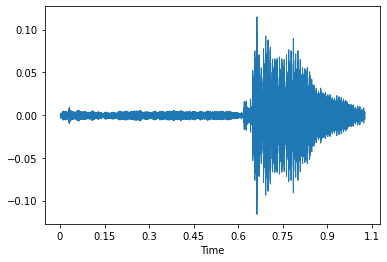

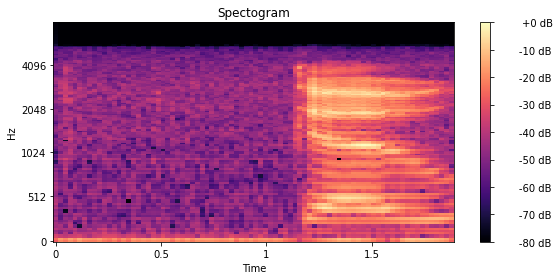

'go'

In [10]:
wav2vec_infer_file("data/raw/SpeechCommands/speech_commands_v0.02/go/004ae714_nohash_0.wav", lit_model=model_ckpt, processor=processor)